In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel(r'C:\Users\23163\Desktop\数模大赛\\Problem 1\Problem 1.xlsx')

In [3]:
df

,波长,光强
0,380(mW/m2/nm),0.021609
1,381(mW/m2/nm),0.018694
2,382(mW/m2/nm),0.017377
3,383(mW/m2/nm),0.030297
4,384(mW/m2/nm),0.029682
...,...,...
396,776(mW/m2/nm),0.513383
397,777(mW/m2/nm),0.500714
398,778(mW/m2/nm),0.487418
399,779(mW/m2/nm),0.474596


In [4]:
df['wavelength'] = df['波长'].str.extract(r'(\d+)').astype(float)
wls = df['wavelength'].values
spd = df['光强'].values

In [6]:
df_cmf = pd.read_csv(r'C:\Users\23163\Desktop\数模大赛\\Problem 1\ciexyzjv.csv')
df_cmf.columns.tolist()

['380', '2.689900e-003', '2.000000e-004', '1.226000e-002']

In [8]:
df_cmf = pd.read_csv(r'C:\Users\23163\Desktop\数模大赛\\Problem 1\ciexyzjv.csv', header=None,
                     names=['wavelength','xbar','ybar','zbar'])

In [9]:
df_cmf = df_cmf[df_cmf['wavelength'].isin(wls)].sort_values('wavelength')
wls_cmf = df_cmf['wavelength'].values
xbar = df_cmf['xbar'].values
ybar = df_cmf['ybar'].values
zbar = df_cmf['zbar'].values

In [10]:
xbar_i = np.interp(wls, wls_cmf, xbar)
ybar_i = np.interp(wls, wls_cmf, ybar)
zbar_i = np.interp(wls, wls_cmf, zbar)

In [11]:
X = np.trapz(spd * xbar_i, wls)
Y = np.trapz(spd * ybar_i, wls)
Z = np.trapz(spd * zbar_i, wls)

In [12]:
print(f"X={X:.3f}, Y={Y:.3f}, Z={Z:.3f}")

X=1437.000, Y=1428.797, Z=832.470


In [16]:
sum_xyz = X + Y + Z
x = X / sum_xyz
y = Y / sum_xyz
n = (x - 0.3320) / (y - 0.1858)

# 6. 应用 McCamy 近似公式
CCT_mccamy = -437 * n**3 + 3601 * n**2 - 6861 * n + 5514.31

print(x, y)
print(f"Computed CCT (McCamy) = {CCT_mccamy:.2f} K")

0.3885603348086552 0.3863423638307409
Computed CCT (McCamy) = 3855.89 K


In [17]:
up = 4 * X / (X + 15 * Y + 3 * Z)
vp = 9 * Y / (X + 15 * Y + 3 * Z)

def u_bb(T):
    return (0.860117757 + 1.54118254e-4 * T + 1.28641212e-7 * T**2) / \
           (1 + 8.42420235e-4 * T + 7.08145163e-7 * T**2)

def v_bb(T):
    return (0.317398726 + 4.22806245e-5 * T + 4.20481691e-8 * T**2) / \
           (1 - 2.89741816e-5 * T + 1.61456053e-7 * T**2)

# —————————————— 9. 黑体轨迹在 CIE1960 UCS → 换算到 CIE1976 u',v' ——————————————
ubb_val = u_bb(CCT_mccamy)       # CIE1960 u
vbb_val = v_bb(CCT_mccamy)       # CIE1960 v
up_bb = ubb_val                  # CIE1976 u' 等于 CIE1960 u
vp_bb = 1.5 * vbb_val            # CIE1976 v' = (9/6)*v

In [18]:
Duv = np.sqrt((up - up_bb)**2 + (vp - vp_bb)**2)
print(f"Duv (unsigned) = {Duv:.4f}")

Duv (unsigned) = 0.0030


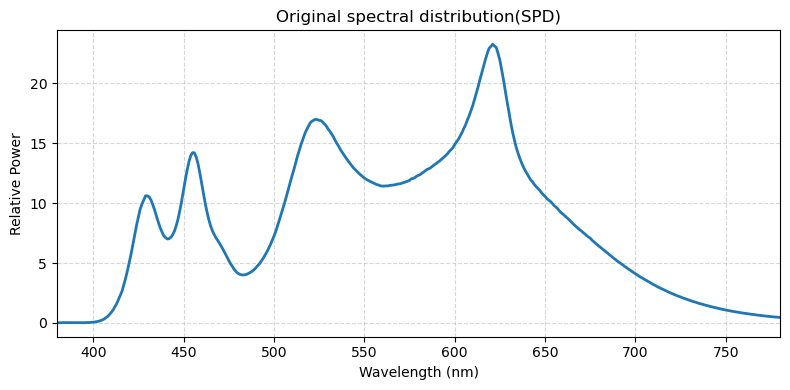

In [19]:

# 假设你已经有：
# wls = df['wavelength'].values   # 波长数组
# spd = df['光强'].values          # 对应的光强

plt.figure(figsize=(8, 4))
plt.plot(wls, spd, linewidth=2)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Relative Power')
plt.title('Original spectral distribution(SPD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(wls.min(), wls.max())
plt.tight_layout()
plt.show()